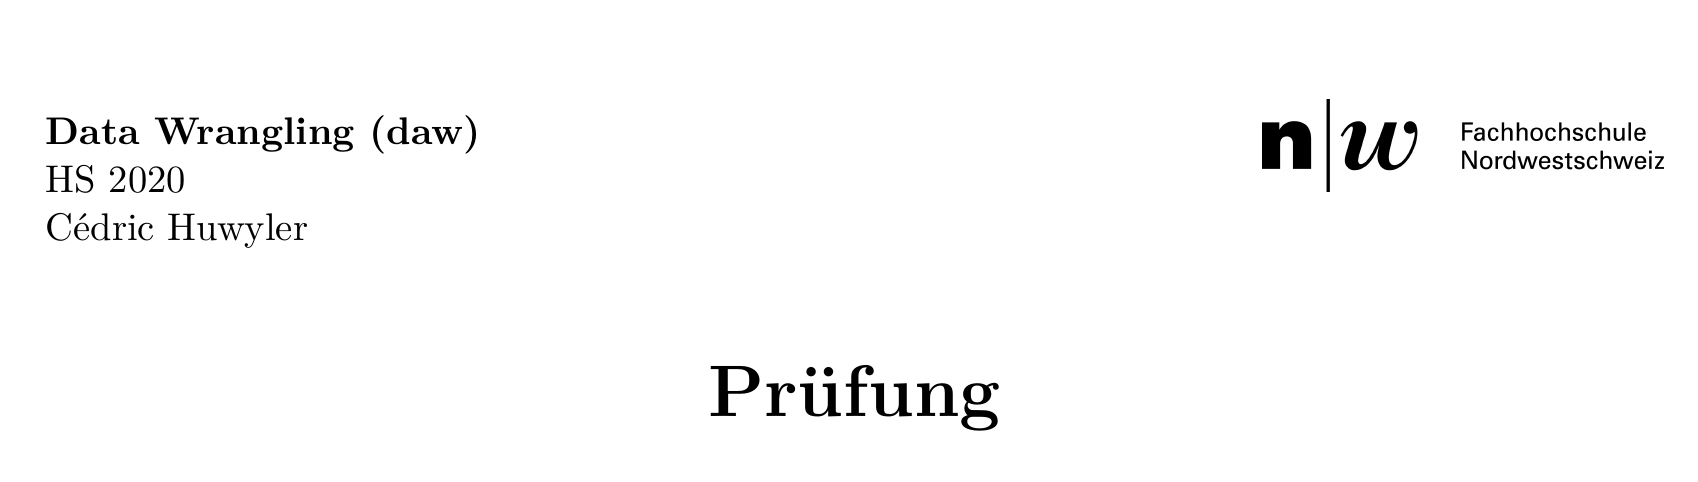

Versionsinfo über Pandas, Numpy und Scikit-Learn:

In [2]:
import pandas as pd
import numpy as np
import sklearn
print("Pandas {}".format(pd.__version__))
print("Numpy {}".format(np.__version__))
print("Scikit-Learn {}".format(sklearn.__version__))

Pandas 2.2.0
Numpy 1.23.3
Scikit-Learn 1.5.0


## Aufgabe 1: Data Wrangling Basics (27 Punkte)

In der Datei `'tips.csv'` finden Sie einen Datensatz mit Erhebungen einer Bar. Darin enthalten sind pro Tisch: totaler Rechnungsbetrag, Trinkgeldbetrag, Angabe Raucher/Nicht-Raucher, Wochentag, Tageszeit und Gruppengrösse.

### a) (1 Punkt)

Importieren Sie das Datenset in ein Data Frame.

In [3]:
df = pd.read_csv('tips.csv', delimiter=',')
df

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [4]:
df.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [5]:
df.smoker.unique()

array(['No', 'Yes'], dtype=object)

In [6]:
df.time.unique()

array(['Dinner', 'Lunch'], dtype=object)

### b) (6 Punkte)

Beschreiben Sie die Datentypen der verschiedenen Merkmale: Welche sind diskret und welche stetig? Welche der Merkmale davon sind nominal-, ordinal-, intervall- und welche verhältnisskaliert? 

*Hier ist eine schriftliche Antwort erwartet*

### c) (2 Punkte)

Geben Sie ein Beispiel eines stetigen, aber nicht verhältnisskalierten Merkmals an und erklären Sie kurz:

Size ist ein verhältnisskaliertes Merkmal, da es eine Rangordnung mit definierten Abständen ist und einen Nullpunkt besitzt.

### d) (6 Punkte)

Zurück zum erstellten Data Frame. Formatieren Sie die diskreten Variablen wo nötig als *kategorische* Variablen. Dabei soll die Variable im resultierenden Data Frame über die verschiedenen Ausprägungen des Merkmals Bescheid wissen und wo möglich auch die Bedeutung der Ordnungsrelationen $<$ und $>$ verstehen können.

In [7]:
def set_dtype_inplace(df, column:str, dtype):
	df[column] = df[column].astype(dtype)
    
set_dtype_inplace(df, 'day', pd.CategoricalDtype(["Thur","Fri", "Sat", "Sun"], ordered=True))

set_dtype_inplace(df, 'time', pd.CategoricalDtype(["Lunch","Dinner"], ordered=True))

df = df.replace('No', False)
df = df.replace('Yes', True)

set_dtype_inplace(df, 'smoker', bool)

set_dtype_inplace(df, 'total_bill', float)
set_dtype_inplace(df, 'tip', float)
set_dtype_inplace(df, 'size', int)



C:\Users\denis\AppData\Local\Temp\ipykernel_25884\3167557104.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('Yes', True)


In [8]:
print(df.day.unique)

<bound method Series.unique of 0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
       ... 
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: day, Length: 244, dtype: category
Categories (4, object): ['Thur' < 'Fri' < 'Sat' < 'Sun']>


### e) (6 Punkte)

An welchem Wochentag nahm die Bar durchschnittlich prozentual am meisten Trinkgeld ein? Gib ein informatives Data Frame aus und unterlege deine Antwort mit einem Barplot. Die Wochentage sollen dabei in der korrekten Reihenfolge angeordnet sein.

In [9]:
df["ProzentualesTrinkgeld"] = df["tip"]/df["total_bill"]*100
df

,total_bill,tip,smoker,day,time,size,ProzentualesTrinkgeld
0,16.99,1.01,False,Sun,Dinner,2,5.944673
1,10.34,1.66,False,Sun,Dinner,3,16.054159
2,21.01,3.50,False,Sun,Dinner,3,16.658734
3,23.68,3.31,False,Sun,Dinner,2,13.978041
4,24.59,3.61,False,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...
239,29.03,5.92,False,Sat,Dinner,3,20.392697
240,27.18,2.00,True,Sat,Dinner,2,7.358352
241,22.67,2.00,True,Sat,Dinner,2,8.822232
242,17.82,1.75,False,Sat,Dinner,2,9.820426


In [10]:
temp = df.groupby("day").ProzentualesTrinkgeld.mean().to_frame().reset_index()
temp

C:\Users\denis\AppData\Local\Temp\ipykernel_25884\2260338994.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp = df.groupby("day").ProzentualesTrinkgeld.mean().to_frame().reset_index()


,day,ProzentualesTrinkgeld
0,Thur,16.127563
1,Fri,16.991303
2,Sat,15.315172
3,Sun,16.689729


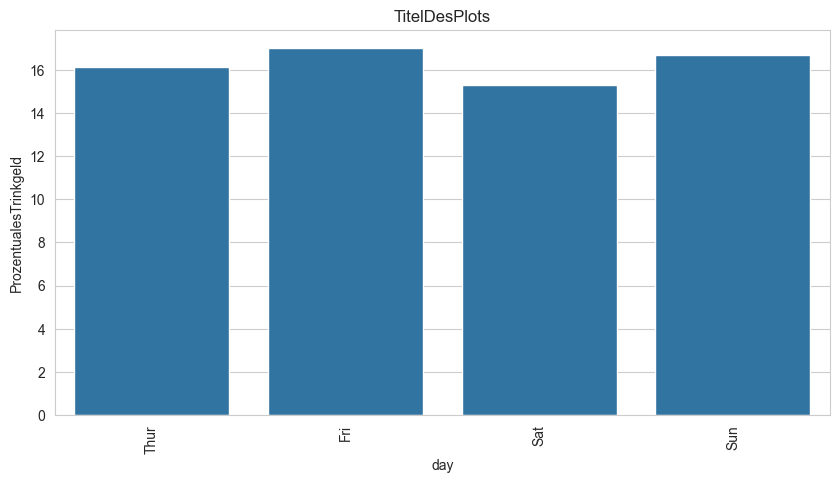

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sns.barplot(temp, x="day", y="ProzentualesTrinkgeld")
plt.xticks(rotation=90)
plt.title("TitelDesPlots")
plt.show()

### f) (6 Punkte)

Wie hängt die prozentuale Trinkgeldhöhe qualitativ mit der Gruppengrösse zusammen? Beurteilen Sie mit einem Boxplot der Trinkgeldhöhe pro Gruppengrösse (alle Boxplots in einem Plot). Geben Sie zur Sicherheit auch die Verteilung der Gruppengrössen an - spielt diese bei Ihrer Beurteilung eine Rolle?

In [12]:
temp = df.groupby("size").ProzentualesTrinkgeld.mean().to_frame().reset_index()
temp

,size,ProzentualesTrinkgeld
0,1,21.729202
1,2,16.571919
2,3,15.215685
3,4,14.594901
4,5,14.149549
5,6,15.622920


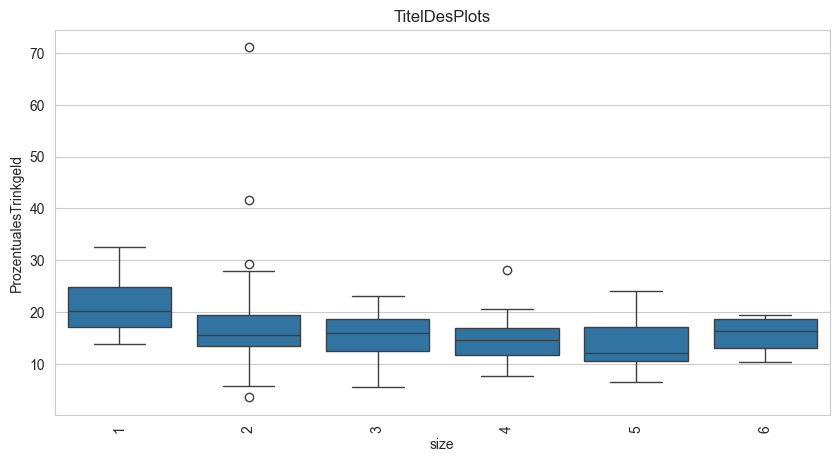

In [13]:
plt.figure(figsize=(10, 5))
sns.boxplot(df, x="size", y="ProzentualesTrinkgeld")
plt.xticks(rotation=90)
plt.title("TitelDesPlots")
plt.show()

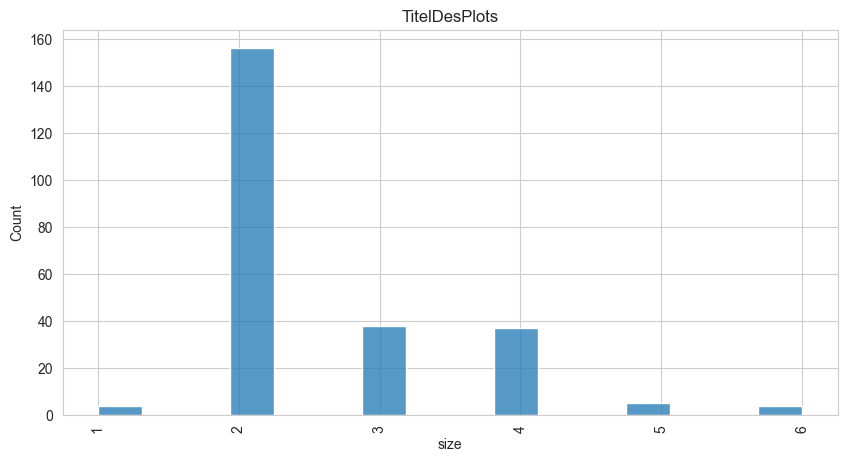

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df, x="size")
plt.xticks(rotation=90)
plt.title("TitelDesPlots")
plt.show()

## Aufgabe 2: Diabetes-Risiko (27 Punkte)

In den zur Verfügung gestellten Dateien finden Sie die Excel-Datei `'diabetes.xlsx'` mit einem Datenset und einer Beschreibung dazu in den verschiedenen Sheets.

### a) (1 Punkt)

Lesen Sie die Beschreibung und importieren Sie das Datenset in ein Data Frame.

In [15]:
import pandas as pd

df = pd.read_excel(
    "diabetes.xlsx", sheet_name='data',
)

In [16]:
df

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


### b) (7 Punkte)

Enthält das Datenset fehlende Werte? Untersuchen Sie die Wertebereiche der einzelnen Spalten genau. Stellen Sie sicher, dass alle klar erkennbaren fehlenden Werte mit `NaN` auch als solche gekennzeichnet sind. Geben Sie die Anzahl der fehlenden Werte pro Spalte absolut und in Prozent aus.

In [17]:
df.describe()

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
df['gtt'] = df['gtt'].replace(0, np.nan)
df['blood_pressure'] = df['blood_pressure'].replace(0, np.nan)
df['insulin'] = df['insulin'].replace(0, np.nan)
df['bmi'] = df['bmi'].replace(0, np.nan)


df.describe()

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
count,767.000000,762.000000,732.000000,767.000000,394.000000,756.000000,767.000000,767.000000,767.000000
mean,3.842243,121.652231,72.405738,20.517601,155.548223,32.455952,0.471674,33.219035,0.348110
std,3.370877,30.540786,12.390616,15.954059,118.775855,6.929448,0.331497,11.752296,0.476682
min,0.000000,44.000000,24.000000,0.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,76.250000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,125.000000,32.300000,0.371000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,190.000000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
nas_prozent = (df.isna().mean()*100).to_frame(name="amount [%]").reset_index(names="column")
nas_abs = (df.isna()).sum().to_frame(name="amount").reset_index(names="column")

nas_prozent

,column,amount [%]
0,n_pregnant,0.000000
1,gtt,0.651890
2,blood_pressure,4.563233
3,triceps_skin_fold_thickness,0.000000
4,insulin,48.631030
5,bmi,1.434159
6,dpf,0.000000
7,age,0.000000
8,class,0.000000


In [20]:
nas_abs

,column,amount
0,n_pregnant,0
1,gtt,5
2,blood_pressure,35
3,triceps_skin_fold_thickness,0
4,insulin,373
5,bmi,11
6,dpf,0
7,age,0
8,class,0


### c) (1 Punkt)

Erklären Sie kurz, warum wir hier das komplette Entfernen der Samples mit fehlenden Werten vermeiden möchten und lieber eine passende Imputationsstrategie wählen.

*Hier ist eine schriftliche Antwort erwartet*

### d) (7 Punkte)

Erstellen Sie ein neues Data Frame und wenden Sie folgenden Strategien an:

* `gtt` und `triceps_skin_fold_thickness`: Imputation mit Median
* `blood_pressure` und `bmi`: Imputation mit Durchschnitt

Stellen Sie am Schluss sicher, dass im neuen Data Frame keine fehlenden Werte mehr vorkommen.

### e) (4 Punkte)

Alternativ können fehlende Werte auch modellbasiert ersetzt werden. Dazu soll ein *k nearest neighbours* (KNN) - Modell verwendet werden (mit `n_neighbours=5`). Verwenden Sie dazu die Klasse `sklearn.impute.KNNImputer` von Scikit-Learn.

Stellen Sie auch hier sicher, dass im neuen Data Frame keine fehlenden Werte mehr vorkommen.

**Hinweis:** Natürlich sollte die Variable \texttt{class} nicht als Grundlage zur Imputation benutzt werden, da sonst Information darüber in die unabhängigen Variablen leakt.

### f) (7 Punkte)

Wir möchten zum Schluss auf dem imputierten Datenset aus Teilaufgabe (e) untersuchen, ob und wie stark Fettleibigkeit zum Diabetesrisiko beiträgt. Erstellen Sie dazu eine neue Spalte `bmi_class` mit der folgenden Einteilung:

$$
\text{bmi_class} = \left\{ \begin{array}{ll}
\text{'underweight'}, & \text{bmi} < 18.5 \\
\text{'normal'}, & 18.5 \leq \text{bmi} < 25 \\
\text{'overweight'}, & 25 \leq \text{bmi} < 30 \\
\text{'obese'}, & \text{bmi} \geq 30 
\end{array}\right.
$$

Die Spalte soll über die Ordinalskala der BMI-Klasse informiert sein.

Berechnen Sie nun das mittlere Diabetesrisiko und die Anzahl der Probanden pro BMI-Klasse. Was ist Ihre Schlussfolgerung?

## Aufgabe 3: Hierarchisch strukturierte Daten (21 Punkte)

Das *Gapminder*-Datenset enthält Daten zum Bruttoinlandprodukt (BIP) pro Kopf (engl. GDP per capita), zur Lebenserwartung (eng. life expectancy) und zur Bevölkerungsgrösse (engl. population) von 142 Ländern auf 5 Kontinenten.

In `gapminder.json` finden Sie ein verschachteltes JSON-Datenset. Dabei ist das oberste Hierarchielevel der Kontinent, das zweitoberste das Land und die relevanten Grössen finden sich schliesslich in der dritten Hierarchiestufe.

### a) (9 Punkte)

Lesen Sie das Json-File als Dictionary ein und bringen Sie es in die Form eines flachen Data Frames:

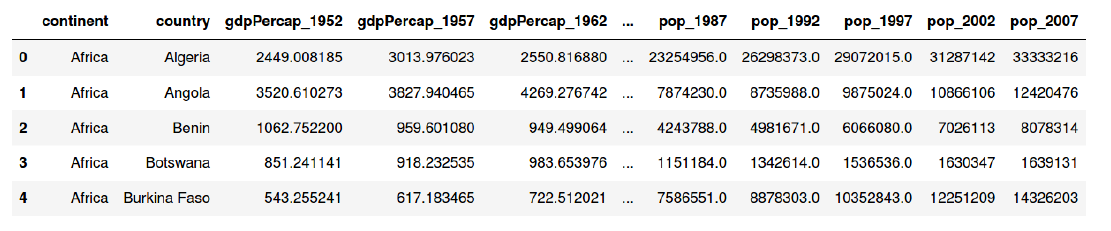

**Hinweis:** Das geht zum Beispiel mit zwei verschachtelten `for`-Loops.

In [42]:
import json
f = open('gapminder.json')
data = json.load(f)
dfs = []
df = pd.DataFrame()

for continent in data:
    for country in data[continent]:
        df['continent'] = continent
        df['country'] = country
        df = pd.DataFrame.from_records(data[continent][country], index=[0])
        dfs.append(df)
        
gapminder = pd.concat(dfs, ignore_index=True)

In [43]:
gapminder

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,...,pop_1972,pop_1977,pop_1982,pop_1987,pop_1992,pop_1997,pop_2002,pop_2007,continent,country
0,2449.008185,3013.976023,2550.816880,3246.991771,4182.663766,4910.416756,5745.160213,5681.358539,5023.216647,4797.295051,...,14760787.0,17152804.0,20033753.0,23254956.0,26298373.0,29072015.0,31287142,33333216,Africa,Angola
1,3520.610273,3827.940465,4269.276742,5522.776375,5473.288005,3008.647355,2756.953672,2430.208311,2627.845685,2277.140884,...,5894858.0,6162675.0,7016384.0,7874230.0,8735988.0,9875024.0,10866106,12420476,Africa,Benin
2,1062.752200,959.601080,949.499064,1035.831411,1085.796879,1029.161251,1277.897616,1225.856010,1191.207681,1232.975292,...,2761407.0,3168267.0,3641603.0,4243788.0,4981671.0,6066080.0,7026113,8078314,Africa,Botswana
3,851.241141,918.232535,983.653976,1214.709294,2263.611114,3214.857818,4551.142150,6205.883850,7954.111645,8647.142313,...,619351.0,781472.0,970347.0,1151184.0,1342614.0,1536536.0,1630347,1639131,Africa,Burkina Faso
4,543.255241,617.183465,722.512021,794.826560,854.735976,743.387037,807.198586,912.063142,931.752773,946.294962,...,5433886.0,5889574.0,6634596.0,7586551.0,8878303.0,10352843.0,12251209,14326203,Africa,Burundi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,14734.232750,17909.489730,20431.092700,22966.144320,27195.113040,26982.290520,28397.715120,30281.704590,31871.530300,32135.323010,...,6401400.0,6316424.0,6468126.0,6649942.0,6995447.0,7193761.0,7361757,7554661,Europe,Turkey
138,1969.100980,2218.754257,2322.869908,2826.356387,3450.696380,4269.122326,4241.356344,5089.043686,5678.348271,6601.429915,...,37492953.0,42404033.0,47328791.0,52881328.0,58179144.0,63047647.0,67308928,71158647,Europe,United Kingdom
139,9979.508487,11283.177950,12477.177070,14142.850890,15895.116410,17428.748460,18232.424520,21664.787670,22705.092540,26074.531360,...,56079000.0,56179000.0,56339704.0,56981620.0,57866349.0,58808266.0,59912431,60776238,Oceania,Australia
140,10039.595640,10949.649590,12217.226860,14526.124650,16788.629480,18334.197510,19477.009280,21888.889030,23424.766830,26997.936570,...,13177000.0,14074100.0,15184200.0,16257249.0,17481977.0,18565243.0,19546792,20434176,Oceania,New Zealand


### b) (9 Punkte)

Bringen Sie nun das Data Frame in die folgende Form:

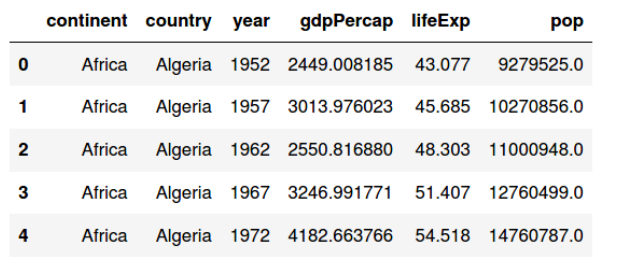

### c) (3 Punkte)

Stellen Sie die Entwicklung der durchschnittlichen Lebenserwartung pro Kontinent graphsich dar. Gewichten Sie in der Berechnung des Durchschnitts nach Bevölkerungsgrösse pro Land.